## 🧠 Ejercicio Avanzado: Planificación de Rutas de Entrega

Una empresa de logística realiza entregas entre distintas ciudades del Ecuador. Las ciudades están conectadas por rutas con costos asociados que representan el **precio del combustible + peajes** en USD. El gerente desea conocer la **ruta más económica** para enviar mercancía desde **Ibarra** hasta **Loja**, pasando por al menos una ciudad costera.

### 📍 Ciudades:
- Ibarra
- Quito
- Santo Domingo
- Manta (costera)
- Portoviejo (costera)
- Guayaquil (costera)
- Cuenca
- Loja

### 🛣️ Conexiones y costos (USD):
- Ibarra → Quito: 10
- Quito → Santo Domingo: 15
- Quito → Manta: 30
- Santo Domingo → Manta: 12
- Manta → Portoviejo: 5
- Portoviejo → Guayaquil: 20
- Guayaquil → Cuenca: 25
- Cuenca → Loja: 18
- Quito → Cuenca: 35
- Santo Domingo → Guayaquil: 22
- Guayaquil → Loja: 40

---
### 🎯 Objetivos del estudiante
- Representar el grafo dirigido y ponderado.
- Visualizar el grafo con `networkx`.
- Usar `dijkstra_path` para determinar el **camino más económico desde Ibarra hasta Loja**, verificando que **pase por al menos una ciudad costera** (`Manta`, `Portoviejo`, o `Guayaquil`).
- Mostrar el recorrido y el costo total.

💡 *Sugerencia:* Puedes comprobar si una ciudad costera está incluida en el camino usando una intersección de conjuntos en Python.

## Realizado por Jeremy Jácome

## Rúbrica de Evaluación: Ejercicio de Logística con Grafos

| Criterio Evaluado                                                                 | Puntaje Máximo |
|----------------------------------------------------------------------------------|----------------|
| Creación correcta del grafo con nodos y aristas                              | 20 puntos      |
| Asignación correcta de pesos (costos) a todas las conexiones                 | 15 puntos      |
| Visualización clara y bien etiquetada del grafo usando `networkx` y `matplotlib` | 20 puntos      |
| Cálculo correcto del camino más barato con `dijkstra_path`                   | 15 puntos      |
| Verificación de que el camino pase por al menos una ciudad costera          | 10 puntos      |
| Interpretación correcta del resultado (camino y costo total)                 | 10 puntos      |
| Claridad del código, comentarios y estilo                                    | 10 puntos      |
| **Total**                                                                       | **100 puntos** |

**Nota:** Se valorará la creatividad, la correcta identificación de ciudades, el uso adecuado de funciones de `networkx` y la legibilidad del código.


In [28]:
#1. Crear un grafo dirigido y ponderado con `networkx`.
print("Realizado por Jeremy Jácome")
# 📦 Importamos librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt

# 🧠 Creamos un grafo dirigido y ponderado
G = nx.DiGraph()

# 🧱 Añadimos nodos manualmente (opcional, también se crean automáticamente al agregar aristas)
G.add_nodes_from(['Quito', 'Ibarra', 'Santo Domingo', 'Manta', 'Portoviejo', 'Guayaquil', 'Loja'])

# ➕ Añadimos aristas con pesos usando el parámetro 'weight'
G.add_edge('Ibarra', 'Quito', weight=10)
G.add_edge('Quito', 'Santo Domingo', weight=15)
G.add_edge('Quito', 'Manta', weight=30)
G.add_edge('Santo Domingo', 'Manta', weight=12)
G.add_edge('Manta', 'Portoviejo', weight=5)
G.add_edge('Portoviejo', 'Guayaquil', weight=20)
G.add_edge('Guayaquil', 'Cuenca', weight=25)
G.add_edge('Cuenca', 'Loja', weight=18)
G.add_edge('Quito', 'Cuenca', weight=35)
G.add_edge('Santo Domingo', 'Guayaquil', weight=22)
G.add_edge('Guayaquil', 'Loja', weight=40)
print("Grado de cada nodo:")
# Grado de cada nodo
for nodo in G.nodes:
    print(f"{nodo}: entrada = {G.in_degree(nodo)}, salida = {G.out_degree(nodo)}")

Realizado por Jeremy Jácome
Grado de cada nodo:
Quito: entrada = 1, salida = 3
Ibarra: entrada = 0, salida = 1
Santo Domingo: entrada = 1, salida = 2
Manta: entrada = 2, salida = 1
Portoviejo: entrada = 1, salida = 1
Guayaquil: entrada = 2, salida = 2
Loja: entrada = 2, salida = 0
Cuenca: entrada = 2, salida = 1


Realizado por Jeremy Jácome


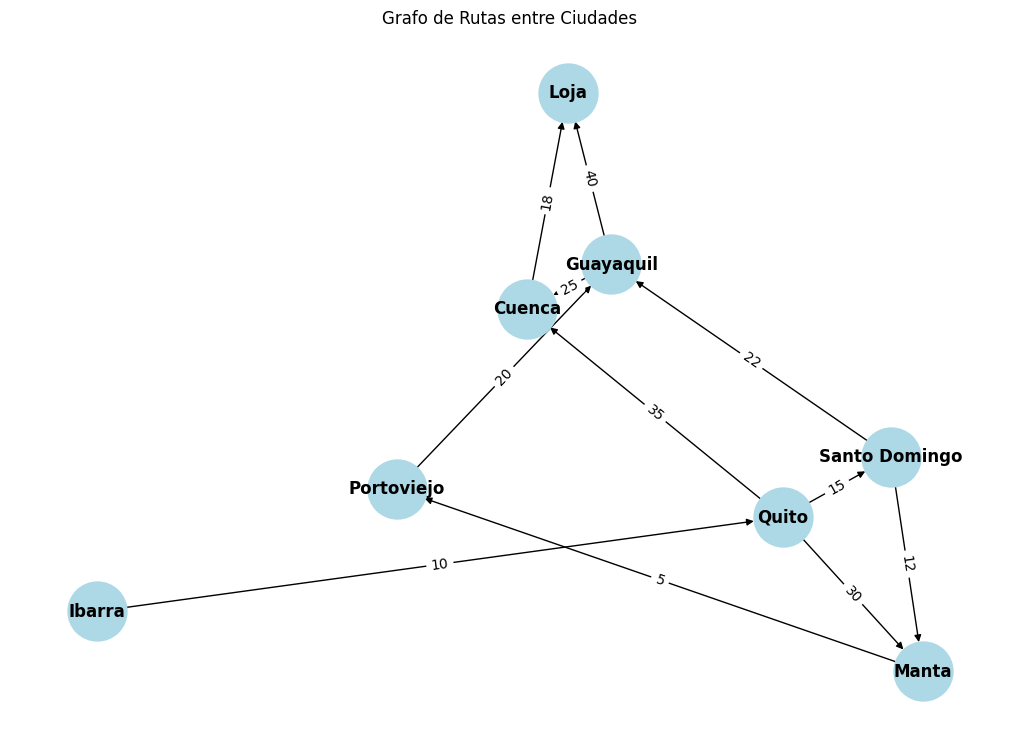

Grado de cada nodo:
Quito: entrada = 1, salida = 3
Ibarra: entrada = 0, salida = 1
Santo Domingo: entrada = 1, salida = 2
Manta: entrada = 2, salida = 1
Portoviejo: entrada = 1, salida = 1
Guayaquil: entrada = 2, salida = 2
Loja: entrada = 2, salida = 0
Cuenca: entrada = 2, salida = 1


Pesos asignados de cada nodo:
Quito → Santo Domingo | peso = 15
Quito → Manta | peso = 30
Quito → Cuenca | peso = 35
Ibarra → Quito | peso = 10
Santo Domingo → Manta | peso = 12
Santo Domingo → Guayaquil | peso = 22
Manta → Portoviejo | peso = 5
Portoviejo → Guayaquil | peso = 20
Guayaquil → Cuenca | peso = 25
Guayaquil → Loja | peso = 40
Cuenca → Loja | peso = 18


In [36]:
#2. Representar el grafo visualmente.
print("Realizado por Jeremy Jácome")
# 📦 Importamos librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt

# 🧠 Creamos un grafo dirigido y ponderado
G = nx.DiGraph()

# 🧱 Añadimos nodos manualmente (opcional, también se crean automáticamente al agregar aristas)
G.add_nodes_from(['Quito', 'Ibarra', 'Santo Domingo', 'Manta', 'Portoviejo', 'Guayaquil', 'Loja'])

# ➕ Añadimos aristas con pesos usando el parámetro 'weight'
G.add_edge('Ibarra', 'Quito', weight=10)
G.add_edge('Quito', 'Santo Domingo', weight=15)
G.add_edge('Quito', 'Manta', weight=30)
G.add_edge('Santo Domingo', 'Manta', weight=12)
G.add_edge('Manta', 'Portoviejo', weight=5)
G.add_edge('Portoviejo', 'Guayaquil', weight=20)
G.add_edge('Guayaquil', 'Cuenca', weight=25)
G.add_edge('Cuenca', 'Loja', weight=18)
G.add_edge('Quito', 'Cuenca', weight=35)
G.add_edge('Santo Domingo', 'Guayaquil', weight=22)
G.add_edge('Guayaquil', 'Loja', weight=40)
# 🎯 Posiciones para graficar el grafo (usa spring_layout para distribución estética)
pos = nx.spring_layout(G, seed=60)

# 🎨 Dibujamos nodos y aristas
plt.figure(figsize=(10, 7))
nx.draw(
    G, pos, with_labels=True,
    node_color='lightblue', node_size=1800,
    font_size=12, font_weight='bold', arrows=True
)

# 🏷️ Extraemos los pesos de las aristas para dibujarlos como etiquetas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# 🧾 Título
plt.title("Grafo de Rutas entre Ciudades")
plt.axis('off')
plt.show()
# Grado de cada nodo
print("Grado de cada nodo:")
for nodo in G.nodes:
    print(f"{nodo}: entrada = {G.in_degree(nodo)}, salida = {G.out_degree(nodo)}")
# Mostrar todos los pesos asignados
print("\n\nPesos asignados de cada nodo:")
for u, v, datos in G.edges(data=True):
    print(f"{u} → {v} | peso = {datos['weight']}")


Realizado por Jeremy Jácome


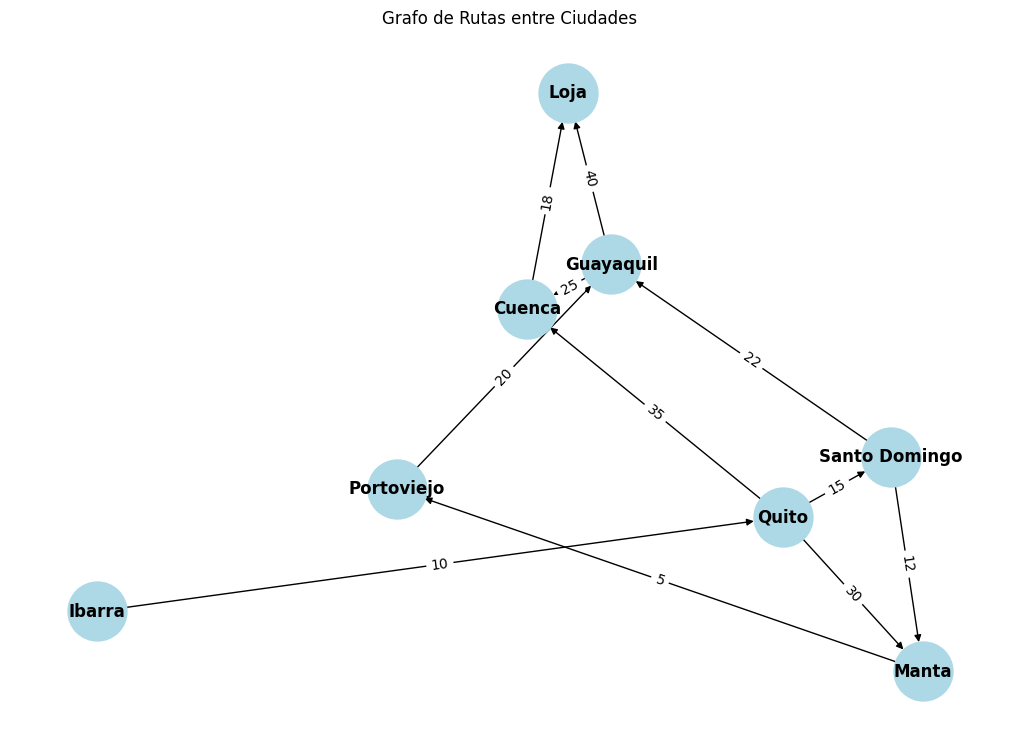

Determinar el camino mas corto desde Ibarra a Loja pasando por una ciudad costera
['Ibarra', 'Quito', 'Santo Domingo', 'Manta', 'Portoviejo', 'Guayaquil', 'Loja'] 102
['Ibarra', 'Quito', 'Santo Domingo', 'Manta', 'Portoviejo', 'Guayaquil', 'Loja'] 102
['Ibarra', 'Quito', 'Santo Domingo', 'Guayaquil', 'Loja'] 87
Camino más barato de Ibarra a Loja pasando por una ciudad costera: ['Ibarra', 'Quito', 'Santo Domingo', 'Guayaquil', 'Loja']
Costo total del viaje: 87


In [37]:
#3. Usar `dijkstra_path` para determinar el **camino más económico desde Ibarra hasta Loja**, 
# verificando que **pase por al menos una ciudad costera** (`Manta`, `Portoviejo`, o `Guayaquil`).
print("Realizado por Jeremy Jácome")
# # 📦 Importamos librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt

# 🧠 Creamos un grafo dirigido y ponderado
G = nx.DiGraph()

# 🧱 Añadimos nodos manualmente (opcional, también se crean automáticamente al agregar aristas)
G.add_nodes_from(['Quito', 'Ibarra', 'Santo Domingo', 'Manta', 'Portoviejo', 'Guayaquil', 'Loja'])

# ➕ Añadimos aristas con pesos usando el parámetro 'weight'
G.add_edge('Ibarra', 'Quito', weight=10)
G.add_edge('Quito', 'Santo Domingo', weight=15)
G.add_edge('Quito', 'Manta', weight=30)
G.add_edge('Santo Domingo', 'Manta', weight=12)
G.add_edge('Manta', 'Portoviejo', weight=5)
G.add_edge('Portoviejo', 'Guayaquil', weight=20)
G.add_edge('Guayaquil', 'Cuenca', weight=25)
G.add_edge('Cuenca', 'Loja', weight=18)
G.add_edge('Quito', 'Cuenca', weight=35)
G.add_edge('Santo Domingo', 'Guayaquil', weight=22)
G.add_edge('Guayaquil', 'Loja', weight=40)
# 🎯 Posiciones para graficar el grafo (usa spring_layout para distribución estética)
pos = nx.spring_layout(G, seed=60)

# 🎨 Dibujamos nodos y aristas
plt.figure(figsize=(10, 7))
nx.draw(
    G, pos, with_labels=True,
    node_color='lightblue', node_size=1800,
    font_size=12, font_weight='bold', arrows=True
)

# 🏷️ Extraemos los pesos de las aristas para dibujarlos como etiquetas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# 🧾 Título
plt.title("Grafo de Rutas entre Ciudades")
plt.axis('off')
plt.show()

#Definir las ciudades costeras
ciudades_costeras = {'Manta', 'Portoviejo', 'Guayaquil'}

#Encontrar la mejor ruta pasando por una ciudad costera
mejor_camino = None
mejor_costo = None
print("Determinar el camino mas corto desde Ibarra a Loja pasando por una ciudad costera")
for ciudad_costera in ciudades_costeras:
    if ciudad_costera in G:  # Verificar si la ciudad costera existe en el grafo

        #Camino desde Ibarra hasta la ciudad costera
        camino_a_costera = nx.dijkstra_path(G, source='Ibarra', target=ciudad_costera, weight='weight')
        costo_a_costera = nx.dijkstra_path_length(G, source='Ibarra', target=ciudad_costera, weight='weight')

        #Camino desde la ciudad costera hasta Loja
        camino_a_loja = nx.dijkstra_path(G, source=ciudad_costera, target='Loja', weight='weight')
        costo_a_loja = nx.dijkstra_path_length(G, source=ciudad_costera, target='Loja', weight='weight')

        #Evaluar si es el camino más barato
        costo_total = costo_a_costera + costo_a_loja
        camino_total = camino_a_costera[:-1] + camino_a_loja  # Unimos los caminos evitando repetir la ciudad costera
        print(camino_total, costo_total)

        if mejor_costo is None or costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_camino = camino_total



#Mostrar el resultado
if mejor_camino:
    print("Camino más barato de Ibarra a Loja pasando por una ciudad costera:", mejor_camino)
    print("Costo total del viaje:", mejor_costo)
else:
    print("No existe un camino válido que pase por una ciudad costera.")